In [ ]:
#download
import pandas as pd
url = 'https://fbref.com/en/squads/8cec06e1/2024-2025/matchlogs/c9/possession/Wolverhampton-Wanderers-Match-Logs-Premier-League'
df = pd.read_html(url, attrs={"id": "matchlogs_for"})[0]
df.to_excel("wolves_possession_matchlogs.xlsx")

In [7]:
#reload
df = pd.read_excel("wolves_possession_matchlogs.xlsx")
df.head()
# print(df.columns.tolist())

,Unnamed: 0,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR,Tier
0,0,2024-08-17,15:00,Matchweek 1,Sat,Away,L,0,2,Arsenal,...,1620,738,12,8,6,16,10,318,24,Top 6
1,1,2024-08-25,14:00,Matchweek 2,Sun,Home,L,2,6,Chelsea,...,1389,794,17,10,4,11,6,270,27,Top 6
2,2,2024-08-31,15:00,Matchweek 3,Sat,Away,D,1,1,Nott'ham Forest,...,1824,944,11,16,4,21,11,291,21,Bottom 14
3,3,2024-09-15,16:30,Matchweek 4,Sun,Home,L,1,2,Newcastle Utd,...,1804,948,13,14,5,10,6,384,31,Top 6
4,4,2024-09-21,15:00,Matchweek 5,Sat,Away,L,1,3,Aston Villa,...,1543,781,15,12,4,9,7,359,15,Top 6


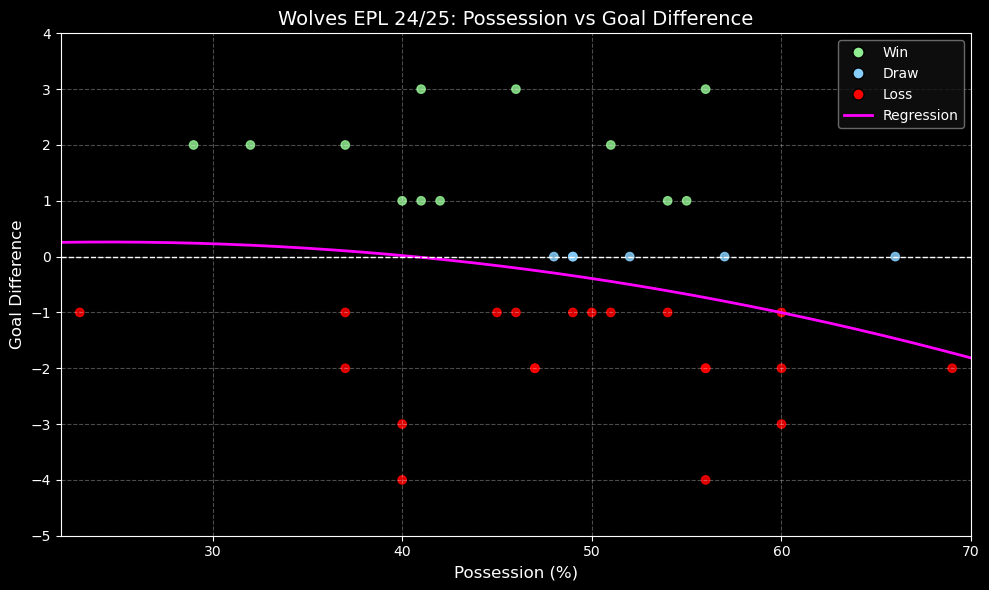

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
df = pd.read_excel('wolves_possession_matchlogs.xlsx')
df = df.iloc[:-1]
df['Goal Difference'] = df['GF'] - df['GA']

def get_outcome(row):
    if row['GF'] > row['GA']:
        return 'Win'
    elif row['GF'] < row['GA']:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(get_outcome, axis=1)

outcome_colors = {
    'Win': 'lightgreen',
    'Draw': 'lightskyblue',
    'Loss': 'red'
}
df['Color'] = df['Outcome'].map(outcome_colors)

coeffs = np.polyfit(df['Poss'], df['Goal Difference'], deg=2)
poly = np.poly1d(coeffs)

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df['Poss'], df['Goal Difference'], color=df['Color'], alpha=0.85)

x_min, x_max = df['Poss'].min() - 1, df['Poss'].max() + 1
x_vals = np.linspace(x_min, x_max, 200)
y_vals = poly(x_vals)
ax.plot(x_vals, y_vals, color='magenta', linewidth=2)

ax.axhline(0, color='white', linestyle='--', linewidth=1)

ax.set_title('Wolves EPL 24/25: Possession vs Goal Difference', fontsize=14, color='white')
ax.set_xlabel('Possession (%)', fontsize=12, color='white')
ax.set_ylabel('Goal Difference', fontsize=12, color='white')

ax.set_xlim(x_min, x_max)
y_min, y_max = df['Goal Difference'].min() - 1, df['Goal Difference'].max() + 1
ax.set_ylim(y_min, y_max)

ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

custom_legend = [
    Line2D([0], [0], marker='o', color='none', label='Win', markerfacecolor='lightgreen', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Draw', markerfacecolor='lightskyblue', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Loss', markerfacecolor='red', markersize=8),
    Line2D([0], [0], color='magenta', linewidth=2, label='Regression')
]
legend = ax.legend(handles=custom_legend, facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')

plt.tight_layout()
plt.show()


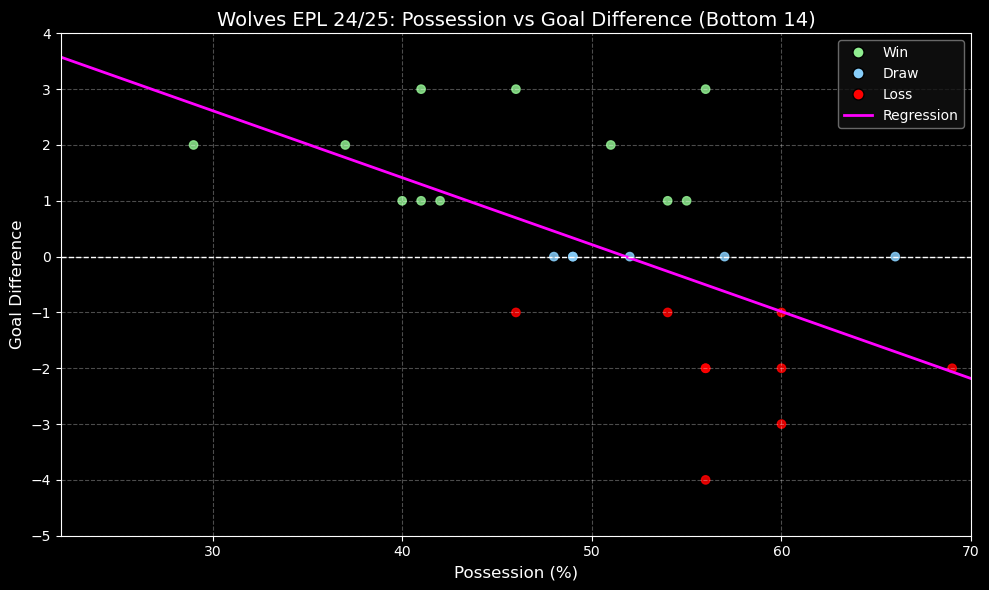

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

df = pd.read_excel('wolves_possession_matchlogs.xlsx')
df = df.iloc[:-1]
df['Goal Difference'] = df['GF'] - df['GA']

def get_outcome(row):
    if row['GF'] > row['GA']:
        return 'Win'
    elif row['GF'] < row['GA']:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(get_outcome, axis=1)

bottom14 = df[df['Tier'] == 'Bottom 14'].copy()

color_map = {
    'Win': 'lightgreen',
    'Draw': 'lightskyblue',
    'Loss': 'red'
}
bottom14['Color'] = bottom14['Outcome'].map(color_map)

plt.style.use('dark_background')

x_min, x_max = df['Poss'].min() - 1, df['Poss'].max() + 1
y_min, y_max = df['Goal Difference'].min() - 1, df['Goal Difference'].max() + 1

coeffs = np.polyfit(bottom14['Poss'], bottom14['Goal Difference'], deg=1)
poly = np.poly1d(coeffs)
x_vals = np.linspace(x_min, x_max, 200)
y_vals = poly(x_vals)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(bottom14['Poss'], bottom14['Goal Difference'], color=bottom14['Color'], alpha=0.85)
ax.plot(x_vals, y_vals, color='magenta', linestyle='-', linewidth=2)
ax.axhline(0, color='white', linestyle='--', linewidth=1)

ax.set_title('Wolves EPL 24/25: Possession vs Goal Difference (Bottom 14)', fontsize=14, color='white')
ax.set_xlabel('Possession (%)', fontsize=12, color='white')
ax.set_ylabel('Goal Difference', fontsize=12, color='white')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

custom_legend = [
    Line2D([0], [0], marker='o', color='none', label='Win', markerfacecolor='lightgreen', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Draw', markerfacecolor='lightskyblue', markersize=8),
    Line2D([0], [0], marker='o', color='none', label='Loss', markerfacecolor='red', markersize=8),
    Line2D([0], [0], color='magenta', linewidth=2, label='Regression')
]
legend = ax.legend(handles=custom_legend, facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')

plt.tight_layout()
plt.show()


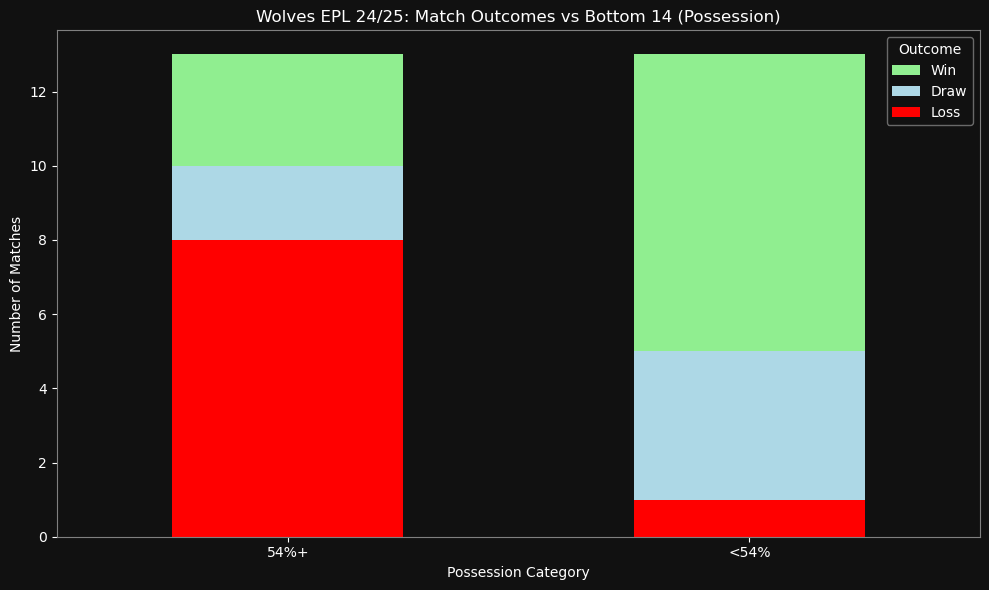

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('wolves_possession_matchlogs.xlsx')
df = df.iloc[:-1]
df['Goal Difference'] = df['GF'] - df['GA']

bottom14 = df[df['Tier'] == 'Bottom 14'].copy()

def outcome(row):
    if row['GF'] > row['GA']:
        return 'Win'
    elif row['GF'] < row['GA']:
        return 'Loss'
    else:
        return 'Draw'

bottom14['Outcome'] = bottom14.apply(outcome, axis=1)

bottom14['Poss Category'] = bottom14['Poss'].apply(lambda x: '54%+' if x >= 54 else '<54%')

poss_counts = bottom14.groupby(['Poss Category', 'Outcome']).size().unstack().fillna(0)
poss_counts = poss_counts[['Loss', 'Draw', 'Win']]

customColors = {
    'Win': 'lightgreen',
    'Draw': 'lightblue',
    'Loss':  'red'
}

ax = poss_counts.plot(
    kind='bar',
    stacked=True,
    color=[customColors['Loss'], customColors['Draw'], customColors['Win']],
    figsize=(10, 6)
)

ax.set_facecolor('#111111')
ax.figure.set_facecolor('#111111')
ax.set_title('Wolves EPL 24/25: Match Outcomes vs Bottom 14 (Possession)', color='white')
ax.set_ylabel('Number of Matches', color='white')
ax.set_xlabel('Possession Category', color='white')
ax.tick_params(axis='x', colors='white', rotation=0)
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_color('gray')

legend = ax.legend(title='Outcome', facecolor='#111111', edgecolor='gray')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Outcome', facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.tight_layout()
plt.show()


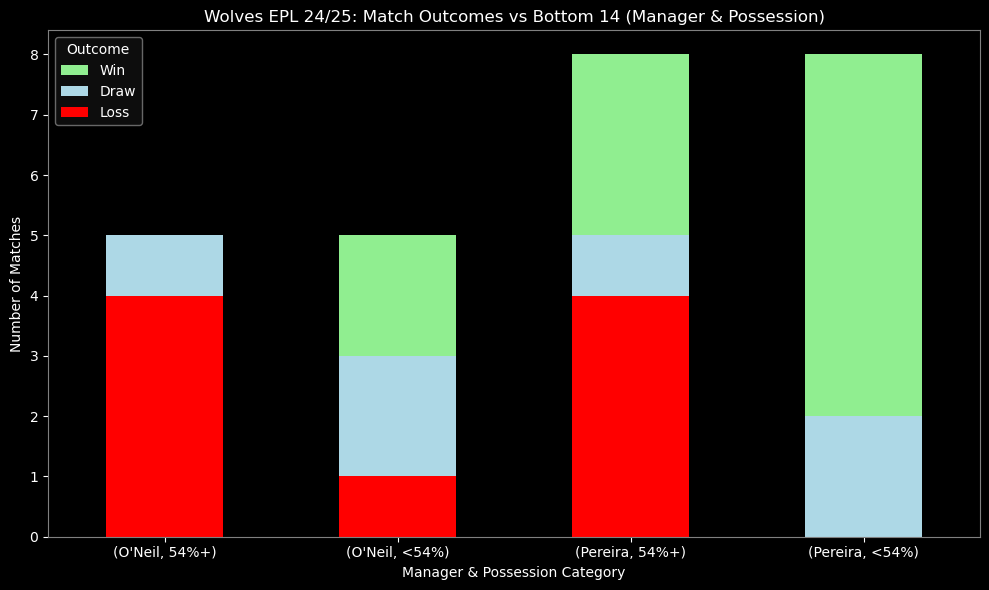

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('wolves_possession_matchlogs.xlsx')
df = df.iloc[:-1]
df['Goal Difference'] = df['GF'] - df['GA']

df['Date'] = pd.to_datetime(df['Date'])

df = df[df['Tier'] == 'Bottom 14'].copy()

def get_outcome(row):
    if row['GF'] > row['GA']:
        return 'Win'
    elif row['GF'] < row['GA']:
        return 'Loss'
    else:
        return 'Draw'

df['Outcome'] = df.apply(get_outcome, axis=1)

df['Poss Category'] = df['Poss'].apply(lambda x: '54%+' if x >= 54 else '<54%')

cutoff_date = pd.Timestamp('2024-12-22')
df['Manager'] = df['Date'].apply(lambda x: "Pereira" if x >= cutoff_date else "O'Neil")

grouped = df.groupby(['Manager', 'Poss Category', 'Outcome']).size().unstack().fillna(0)
grouped = grouped[['Loss', 'Draw', 'Win']]

customColors = {
    'Loss': 'red',
    'Draw': 'lightblue',
    'Win':  'lightgreen'
}

plt.style.use('dark_background')

ax = grouped.plot(
    kind='bar',
    stacked=True,
    color=[customColors['Loss'], customColors['Draw'], customColors['Win']],
    figsize=(10, 6)
)

ax.set_title('Wolves EPL 24/25: Match Outcomes vs Bottom 14 (Manager & Possession)', color='white')
ax.set_ylabel('Number of Matches', color='white')
ax.set_xlabel('Manager & Possession Category', color='white')
ax.tick_params(axis='x', colors='white', rotation=0)
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_color('gray')

legend = ax.legend(title='Outcome', facecolor='#111111', edgecolor='gray')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Outcome', facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.tight_layout()
plt.show()
